In [1]:
# Important librares

import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np
import tensorflow as tf 
import keras

#### Loading the dataset

In [2]:
training_df = pd.read_csv(r'/Users/adityanaik/Desktop/Summer project/healthcare-chatbot-master/Data/Training.csv')
training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


##### Removing the punctuations from the columns of the training data

In [3]:
symptom_corpus = list(training_df.columns)
symptom_corpus = [x.replace('_', ' ') for x in symptom_corpus]
symptom_corpus = [x.translate(str.maketrans('', '', string.punctuation)) for x in symptom_corpus]
symptom_corpus = [x.translate(str.maketrans('', '', string.digits)) for x in symptom_corpus]
training_df.columns = symptom_corpus
training_df.head()
len(symptom_corpus)

133

##### Loading the testing data and Removing the punctuations from the columns

In [4]:
testing_df = pd.read_csv(r'/Users/adityanaik/Desktop/Summer project/healthcare-chatbot-master/Data/Testing.csv')
testing_df.head()
symptom_corpus = list(testing_df.columns)
symptom_corpus = [x.replace('_', ' ') for x in symptom_corpus]
symptom_corpus = [x.translate(str.maketrans('', '', string.punctuation)) for x in symptom_corpus]
symptom_corpus = [x.translate(str.maketrans('', '', string.digits)) for x in symptom_corpus]
testing_df.columns = symptom_corpus
testing_df.head()
len(symptom_corpus)


133

In [5]:
# Shuffling the data
training_df = training_df.sample(frac=1).reset_index(drop=True)

In [6]:
training_df.head()

,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,ulcers on tongue,...,blackheads,scurring,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae


In [7]:

training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
training_df.shape

(4920, 133)

Now we separate the data into the training data and the labels. We drop the column toxic look typhus and typhus is a dieseas and not a symptom and dischromic pathches as the models used for matching synonyms are finding it difficult to generate embeddings for the word dischromic.

In [9]:
X_train = training_df.drop(['prognosis', 'dischromic  patches', 'toxic look typhos'], axis = 1)
y_train = training_df['prognosis']

In [10]:
X_train.shape

(4920, 130)

We see that we have about 41 disease labels

In [11]:
y_train.unique()

array(['Dimorphic hemmorhoids(piles)', 'Malaria', 'Hyperthyroidism',
       'Peptic ulcer diseae', 'Acne', 'Hepatitis B', 'Common Cold',
       'Osteoarthristis', 'Allergy', 'Typhoid', 'Hypoglycemia',
       'Diabetes ', 'hepatitis A', 'Impetigo', 'Alcoholic hepatitis',
       'Hepatitis E', 'Hepatitis D', 'Bronchial Asthma', 'Pneumonia',
       'Hypothyroidism', 'Urinary tract infection',
       'Cervical spondylosis', 'Tuberculosis', 'Arthritis',
       'Fungal infection', 'Gastroenteritis', 'AIDS', 'Hepatitis C',
       'Jaundice', 'Heart attack', 'GERD', 'Hypertension ',
       'Paralysis (brain hemorrhage)', 'Varicose veins', 'Drug Reaction',
       'Psoriasis', 'Dengue', '(vertigo) Paroymsal  Positional Vertigo',
       'Chronic cholestasis', 'Migraine', 'Chicken pox'], dtype=object)

In [12]:
X_train.head()

,itching,skin rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,stomach pain,acidity,ulcers on tongue,...,pus filled pimples,blackheads,scurring,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train.head()

0    Dimorphic hemmorhoids(piles)
1                         Malaria
2                         Malaria
3                 Hyperthyroidism
4             Peptic ulcer diseae
Name: prognosis, dtype: object

In [20]:
X_test = testing_df.drop(['prognosis', 'dischromic  patches', 'toxic look typhos'], axis = 1)
y_test = testing_df['prognosis']

## Machine learninig

In [14]:
# Importing the necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
%matplotlib inline

In [15]:
# Plotting the grid search metrics
def plot_search_results(grid, params):
    """
    Parameters: 
        grid: A trained GridSearchCV object.
        params: A dictionary of model attributes as keys and the values as the list of values the parameters 
                take for the grid search 
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    means_train = results['mean_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    
  
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        #print(p)
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[0][p])
        y_1 = np.array(means_test[best_index])
        y_2 = np.array(means_train[best_index])

        plt.title('Mean score per parameter')
        plt.ylabel('Mean accuracy score')
        plt.plot(x, y_1, linestyle='--', marker='o', label='Test')
        plt.plot(x, y_2, linestyle='-', marker='^',label='Train' )
        plt.xlabel(p.upper())
        plt.legend()
        plt.show()

### Logistic regression

In [16]:
# Using grid search to tune hyper parametrers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()
param_grid = [
              {'solver' :['liblinear'], 'penalty' : ['l1', 'l2'], 'max_iter': [15,20, 30, 40]},
              {'solver': ['lbfgs'], 'penalty': ['none', 'l2'], 'max_iter': [ 15, 20, 30, 40]}
]

model1_grid_search = GridSearchCV(logistic_model, param_grid, cv = 4,
                                  scoring = 'accuracy',
                                  return_train_score = True)
grid1 = model1_grid_search.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converg

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

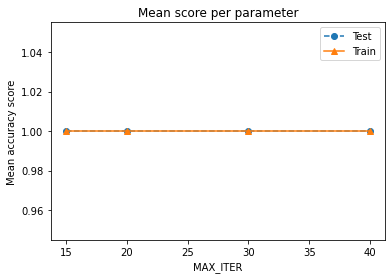

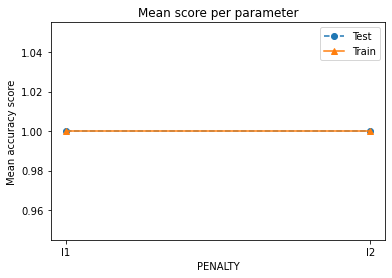

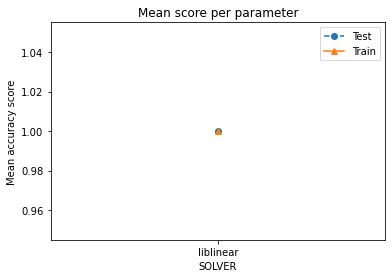

In [17]:
params = [{'solver': ['liblinear'], 'penalty': [ 'l1', 'l2'], 'max_iter': [ 15, 20, 30, 40]}]
plot_search_results(grid1, params)


We see that all values produce a training and validation accuracy of 100%

##### Training and testing the models based on the Hyperparameter tuning

In [18]:
# Using logistic regression 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 80, penalty = 'l2', solver = 'lbfgs')

# Fitting the model to the training data
logistic_model.fit(X_train, y_train)
training_pred = logistic_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train) / len(y_train)
print('Training accuracy: ', training_acc)
average_acc = np.mean(cross_val_score(logistic_model, X_train, y_train, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(logistic_model, X_train, y_train, cv = 10)


print(confusion_matrix(y_train, y_train_predict))
precision = precision_score(y_train, y_train_predict, average = 'micro')
recall = recall_score(y_train, y_train_predict, average = 'micro')
f1 = f1_score(y_train, y_train_predict, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  1.0
Average validation accuracy:  1.0
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


In [21]:
# Test accuracy
y_test_predictions = logistic_model.predict(X_test)

acc = np.count_nonzero(y_test == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test, y_test_predictions))

precision = precision_score(y_test, y_test_predictions, average = 'micro')
recall = recall_score(y_test, y_test_predictions, average = 'micro')
f1 = f1_score(y_test, y_test_predictions,average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  1.0
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


## Decision trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Inintializing the model
Decision_tree_model = DecisionTreeClassifier()

# Parameter Dictionary
param_grid = [
              {'criterion' :['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [ 15, 20, 21, 22, 23], 'min_samples_split' : [2,3,4,5,6],
               'min_samples_leaf': [1,2,3,4,5], 'max_features': [None, 'auto', 'sqrt', 'log2']}
              
]

# Initializing the grid search object
tree_grid_search = GridSearchCV(Decision_tree_model, param_grid, cv = 10,
                                  scoring = 'accuracy',
                                  return_train_score = True)
# Fitting the data
grid2 = tree_grid_search.fit(X_train, y_train)

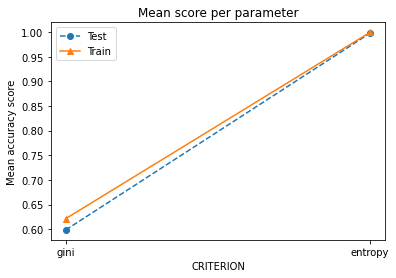

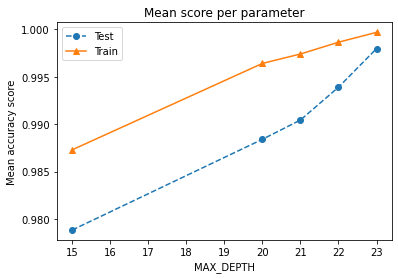

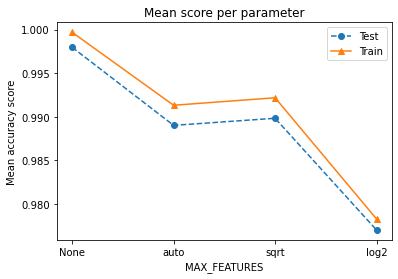

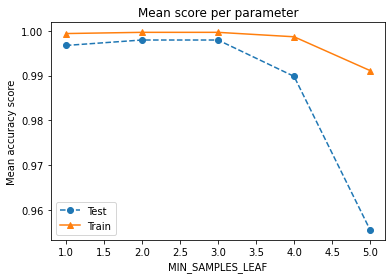

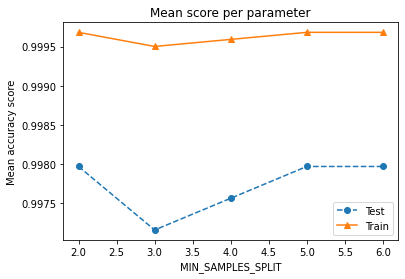

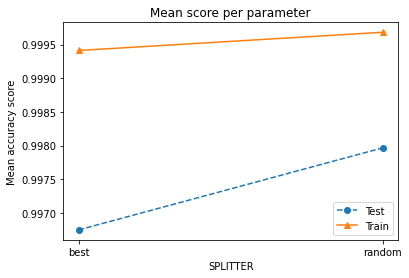

In [23]:
params = [
              {'criterion' :['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [ 15, 20, 21, 22, 23], 'min_samples_split' : [2,3,4,5,6],
               'min_samples_leaf': [1,2,3,4,5], 'max_features': ['None', 'auto', 'sqrt', 'log2']}
              
]

plot_search_results(grid2, params)

##### Training and testing the model based on the Hyperparameter tuning

In [24]:
# Using Decision Trees
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 23,
                                   max_features = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 2,
                                   splitter = 'random')

# Fitting the model to the training data
tree_model.fit(X_train, y_train)
training_pred = tree_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train) / len(y_train)
print('Training accuracy: ', training_acc)

average_acc = np.mean(cross_val_score(tree_model, X_train, y_train, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(tree_model, X_train, y_train, cv = 10)


print(confusion_matrix(y_train, y_train_predict))
precision = precision_score(y_train, y_train_predict, average = 'micro')
recall = recall_score(y_train, y_train_predict, average = 'micro')
f1 = f1_score(y_train, y_train_predict, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  1.0
Average validation accuracy:  0.9967479674796748
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 117   0]
 [  0   0   0 ...   0   0 120]]
precision score:  0.9975609756097561
recall score:  0.9975609756097561
F1-score:  0.9975609756097561


In [25]:
# Test accuracy
y_test_predictions = tree_model.predict(X_test)

acc = np.count_nonzero(y_test == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test, y_test_predictions))

precision = precision_score(y_test, y_test_predictions, average = 'micro')
recall = recall_score(y_test, y_test_predictions, average = 'micro')
f1 = f1_score(y_test, y_test_predictions,average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  1.0
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


## Knn

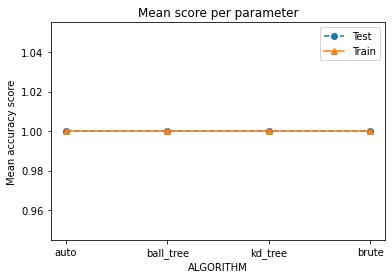

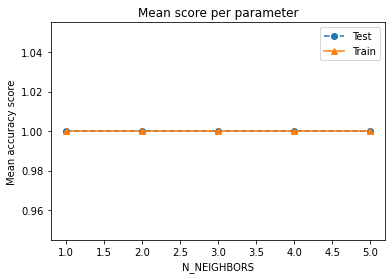

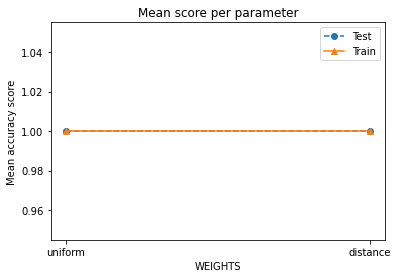

In [26]:
# Using grid search to tune hyper parametrers
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
param_grid1 = [
             {'n_neighbors': [1,2,3,4,5], #21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance']}
]

knn_grid_search = GridSearchCV(knn_model, param_grid1, cv = 10,
                                  scoring = 'accuracy',
                                  return_train_score = True)

grid3 = knn_grid_search.fit(X_train, y_train)


plot_search_results(grid3, param_grid1)

In [27]:
# Ecoding the labels to number labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(y_train))
y_train1 = le.transform(list(y_train))

In [30]:
le = preprocessing.LabelEncoder()
le.fit(list(y_test))
y_test1 = le.transform(list(y_test))

##### Training and testing the models based pn Hyperparameter tuning

In [28]:

knn_model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5 , weights = 'uniform')

# Fitting the model to the training data
knn_model.fit(X_train, y_train1)
training_pred = knn_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train1) / len(y_train1)
print('Training accuracy: ', training_acc)

average_acc = np.mean(cross_val_score(knn_model, X_train, y_train1, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(knn_model, X_train, y_train1, cv = 10)


print(confusion_matrix(y_train1, y_train_predict))
precision = precision_score(y_train1, y_train_predict, average = 'micro')
recall = recall_score(y_train1, y_train_predict, average = 'micro')
f1 = f1_score(y_train1, y_train_predict, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  1.0
Average validation accuracy:  1.0
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


In [32]:
# Test accuracy
y_test_predictions = knn_model.predict(X_test)

acc = np.count_nonzero(y_test1 == y_test_predictions) / len(y_test1)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test1, y_test_predictions))

precision = precision_score(y_test1, y_test_predictions, average = 'micro')
recall = recall_score(y_test1, y_test_predictions, average = 'micro')
f1 = f1_score(y_test1, y_test_predictions, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  1.0
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

# Inintializing the model
nb_model = GaussianNB()

# Fitting the model to the training data
nb_model.fit(X_train, y_train1)
training_pred = nb_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train1) / len(y_train1)
print('Training accuracy: ', training_acc)

average_acc = np.mean(cross_val_score(nb_model, X_train, y_train1, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(nb_model, X_train, y_train1, cv = 10)


print(confusion_matrix(y_train1, y_train_predict))
precision = precision_score(y_train1, y_train_predict, average = 'micro')
recall = recall_score(y_train1, y_train_predict, average = 'micro')
f1 = f1_score(y_train1, y_train_predict, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  1.0
Average validation accuracy:  1.0
[[120   0   0 ...   0   0   0]
 [  0 120   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 120   0   0]
 [  0   0   0 ...   0 120   0]
 [  0   0   0 ...   0   0 120]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


In [48]:
# Test accuracy
y_test_predictions = nb_model.predict(X_test)

acc = np.count_nonzero(y_test1 == y_test_predictions) / len(y_test1)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test1, y_test_predictions))

precision = precision_score(y_test1, y_test_predictions, average = 'micro')
recall = recall_score(y_test1, y_test_predictions, average = 'micro')
f1 = f1_score(y_test1, y_test_predictions, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  1.0
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


## Neural networks

In [49]:
# Dividing the data into the predictors and labels
X1 = X_train
y1 = y_train1

# Dividing the training data again to obtain the vaidation data for using thcall backs
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X1,
                                                                  y1,
                                                                  test_size = 0.2,
                                                                  random_state = 42)

In [50]:
X_train_final.shape

(3936, 130)

In [51]:
def build_model(n_hidden = 1, n_neurons=80, learning_rate = 0.01, input_shape = [130], activation_func = 'relu', loss_func = 'sparse_categorical_crossentropy', optimizer = 'Adam'):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape = input_shape))
  
  for layer in range(n_hidden):

    # We add a batch normalization layer for all layers with activations function other than
    # selu as selu is self normalizing
    if activation_func != 'selu':
      
      # Setting the initializer strategy as he_normal in case of relu and its variants
      if (activation_func in [ tf.keras.layers.PReLU(), tf.keras.layers.LeakyReLU(), 'relu', 'elu']):
        init = 'he_normal'
      
      # Glorot uniforn in case of tanh and sigmoid
      else:
        init = tf.keras.initializers.GlorotUniform()
      
      # Adding a batch normalization layer
      model.add(keras.layers.BatchNormalization())
    
    else:
      # LeCun initializer works well with selu activation function
      init = tf.keras.initializers.LecunUniform()

    model.add(keras.layers.Dense(n_neurons, activation = activation_func, kernel_initializer= init))  
  # Adding the output neuron
  model.add(keras.layers.Dense(41, activation = 'softmax'))
  
  # Compiling the model
  optimizer = optimizer
  model.compile(loss = loss_func, optimizer = optimizer)
  return model

In [52]:
# Using the sklearn wrapper for cross validation
reg_model = keras.wrappers.scikit_learn.KerasClassifier(build_model, batch_size = 32, epochs = 15)

/var/folders/1v/blpk8hh14l91h36fpz2t0c6c0000gn/T/ipykernel_49316/2643125751.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  reg_model = keras.wrappers.scikit_learn.KerasClassifier(build_model, batch_size = 32, epochs = 15)


In [53]:
# Function for plotting the results of the random search
def plot_random_search(cv_results, parameter_name, display_name):
    # Get the mean train and test scores
    y_1 = cv_results['mean_test_score']
    y_2 = cv_results['mean_train_score']

    # Plot random search scores
    x = []
    for i in range(len(results.cv_results_['params'])):
        x.append(str(results.cv_results_['params'][i][parameter_name]))
    plt.title('Mean score per parameter')
    plt.ylabel('Mean score')
    plt.plot(x, y_1, linestyle='--', marker='o', label='Validation')
    plt.plot(x, y_2, linestyle='-', marker='^',label='Train' )
    plt.xlabel(display_name)
    plt.legend()
    plt.show()

##### Activation functions

2022-08-27 12:41:55.573266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:00.831019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:01.267891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:06.071561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:06.484409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:11.324508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:42:11.790311: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'activation_func': <keras.layers.advanced_activations.PReLU object at 0x292d13130>}


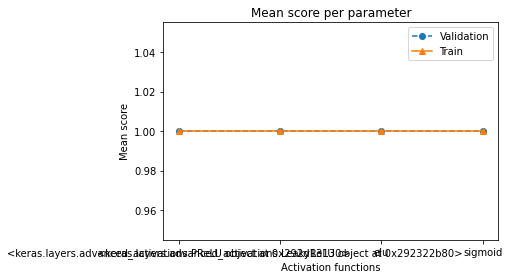

In [54]:
param_distribs = {
    'activation_func': [ tf.keras.layers.PReLU(), tf.keras.layers.LeakyReLU(),'sigmoid', 'tanh', 'relu', 'elu', 'selu']
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'activation_func', 'Activation functions')

##### Hidden layers

2022-08-27 12:43:07.144062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:43:26.062166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:43:27.418188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:43:46.846367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:43:48.224701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:44:06.896411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:44:07.802040: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'n_hidden': 9, 'activation_func': 'sigmoid'}


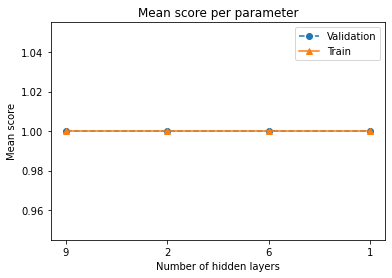

In [55]:
param_distribs = {
    'activation_func' : ['sigmoid'],
    'n_hidden': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'n_hidden', 'Number of hidden layers')

##### Neurons per layer

2022-08-27 12:45:53.461500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:45:57.559566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:45:57.944171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:01.890031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:02.272417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:06.708387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:07.122756: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'n_neurons': 20, 'n_hidden': 1, 'activation_func': 'sigmoid'}


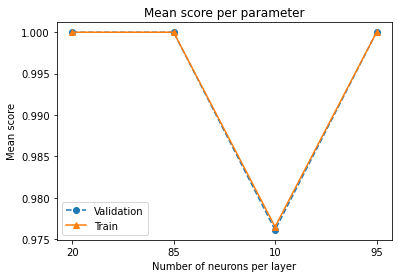

In [56]:
param_distribs = {
    'activation_func' : ['sigmoid'],
    'n_hidden': [1],
    'n_neurons': [10, 20, 40, 60, 79, 85, 90, 95]

}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)
plot_random_search(results.cv_results_, 'n_neurons', 'Number of neurons per layer')

##### Optimizer

2022-08-27 12:46:54.623892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:58.573571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:46:58.959785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:47:02.963953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:47:03.352024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:47:07.334036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:47:07.750516: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'optimizer': 'Adam', 'n_neurons': 20, 'n_hidden': 1, 'activation_func': 'sigmoid'}


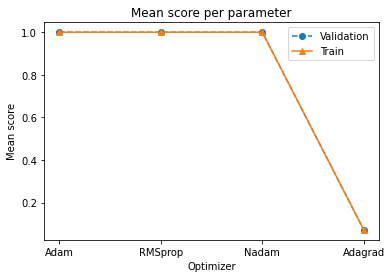

In [57]:
param_distribs = {
    'n_hidden' : [1],
    'n_neurons': [20],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam','RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'optimizer', 'Optimizer')

##### Loss function

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
2022-08-27 12:48:08.441133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:48:12.558120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:48:12.952615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:48:17.042636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:48:17.436841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113]

The best value is:  {'optimizer': 'Adam', 'n_neurons': 20, 'n_hidden': 1, 'loss_func': 'sparse_categorical_crossentropy', 'activation_func': 'sigmoid'}


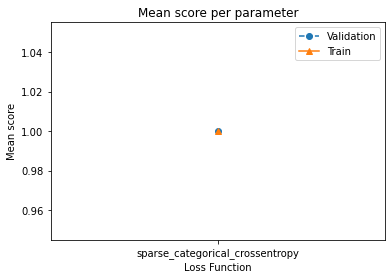

In [58]:
param_distribs = {
    'n_hidden' : [1],
    'n_neurons': [20],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['sparse_categorical_crossentropy']

}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 3,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'loss_func', 'Loss Function')

##### Batch size

2022-08-27 12:48:28.118503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:49:01.378995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:49:01.771846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:49:34.145872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:49:34.549531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:50:06.156253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:50:06.747591: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'optimizer': 'Adam', 'n_neurons': 20, 'n_hidden': 1, 'loss_func': 'sparse_categorical_crossentropy', 'batch_size': 5, 'activation_func': 'sigmoid'}


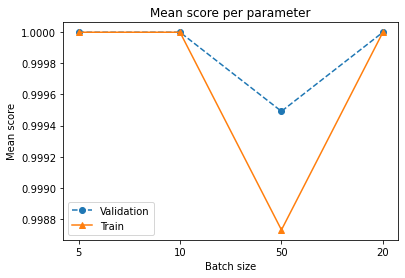

In [59]:
param_distribs = {
    'n_hidden' : [1],
    'n_neurons': [20],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['sparse_categorical_crossentropy'],
    'batch_size': [5, 10, 20, 32, 40, 50, 60]


}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 4,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'batch_size', 'Batch size')

##### Initial learning rate

2022-08-27 12:52:23.321400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:27.981283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:28.394786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:32.858335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:33.306600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:37.393142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-27 12:52:37.779889: I tensorflow/core/grappler/optimizers/cust

The best value is:  {'optimizer': 'Adam', 'n_neurons': 20, 'n_hidden': 1, 'loss_func': 'sparse_categorical_crossentropy', 'learning_rate': 0.01, 'batch_size': 32, 'activation_func': 'sigmoid'}


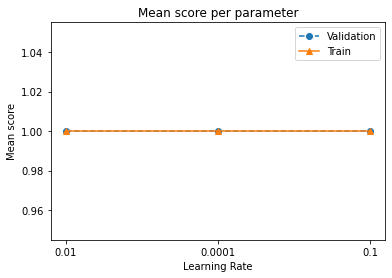

In [60]:
param_distribs = {
    'n_hidden' : [1],
    'n_neurons': [20],
    'activation_func': ['sigmoid'],
    'optimizer': ['Adam'],
    'loss_func' : ['sparse_categorical_crossentropy'],
    'batch_size': [32],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001]


}

random_search = RandomizedSearchCV(reg_model, 
                                   param_distribs, 
                                   cv = 3, 
                                   scoring = 'accuracy',
                                   error_score = 'raise', 
                                   n_iter = 3,
                                   return_train_score = True,
                                   random_state = 42)

results = random_search.fit(X_train_final, y_train_final, verbose = 0)

# Printing the best parameter
print('The best value is: ', random_search.best_params_)

plot_random_search(results.cv_results_, 'learning_rate', 'Learning Rate')

##### Final model function

In [61]:
def final_model(n_hidden = 1, n_neurons=80, learning_rate = 0.01, input_shape = [130], activation_func = 'relu', loss_func = 'mae', optimizer = tf.keras.optimizers.Adam()):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))

    for layer in range(n_hidden):
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(n_neurons, 
                                     activation = activation_func,
                                     kernel_initializer = tf.keras.initializers.GlorotNormal(seed=42))                                 )  
    # Adding the output neuron
    model.add(keras.layers.Dense(41, activation = 'softmax'))

    # Compiling the model
    optimizer = optimizer
    optimizer.learning_rate = learning_rate
    model.compile(loss = loss_func, optimizer = optimizer)

    return model

##### Final model implementation

In [62]:
# Defining and compiling the model
neural_network = final_model(n_hidden = 1,
                            n_neurons = 20,
                            activation_func = 'sigmoid',
                            optimizer = tf.keras.optimizers.Adam(),
                            loss_func = 'sparse_categorical_crossentropy',
                            learning_rate = 0.01)

# Callbacks for better epoch tuning and implementing learning rate scheduling
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10, 
                                              restore_best_weights = True,
                                              monitor = 'val_loss')

# lr scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5)



# Fitting the model
history = neural_network.fit(X_train_final, y_train_final, epochs = 150, batch_size = 50,
                             validation_data = (X_valid, y_valid),
                             callbacks = [
                                          early_stop, 
                                          lr_scheduler
                                          
                                          ]
                             )

Epoch 1/150
10/79 [==>...........................] - ETA: 0s - loss: 3.4178 

2022-08-27 12:53:11.491387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 1s 8ms/step - loss: 1.7368 - val_loss: 0.9662 - lr: 0.0100
Epoch 2/150
13/79 [===>..........................] - ETA: 0s - loss: 0.4289

2022-08-27 12:53:12.143229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 0s 5ms/step - loss: 0.2540 - val_loss: 0.1860 - lr: 0.0100
Epoch 3/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.0683 - lr: 0.0100
Epoch 4/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.0379 - lr: 0.0100
Epoch 5/150
79/79 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.0255 - lr: 0.0100
Epoch 6/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0189 - lr: 0.0100
Epoch 7/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0147 - lr: 0.0100
Epoch 8/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0119 - lr: 0.0100
Epoch 9/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0098 - lr: 0.0100
Epoch 10/150
79/79 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0083 - lr: 0.0100
Epo

79/79 [==============================] - 0s 5ms/step - loss: 2.4819e-04 - val_loss: 2.3966e-04 - lr: 0.0012
Epoch 73/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4829e-04 - val_loss: 2.3862e-04 - lr: 6.2500e-04
Epoch 74/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4708e-04 - val_loss: 2.3754e-04 - lr: 6.2500e-04
Epoch 75/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4399e-04 - val_loss: 2.3644e-04 - lr: 6.2500e-04
Epoch 76/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4306e-04 - val_loss: 2.3521e-04 - lr: 6.2500e-04
Epoch 77/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4474e-04 - val_loss: 2.3404e-04 - lr: 6.2500e-04
Epoch 78/150
79/79 [==============================] - 0s 6ms/step - loss: 2.4062e-04 - val_loss: 2.3342e-04 - lr: 3.1250e-04
Epoch 79/150
79/79 [==============================] - 0s 5ms/step - loss: 2.4020e-04 - val_loss: 2.3279e-04 - lr: 3.1250e-04
Epoch 80/150
79/7

In [63]:
le = preprocessing.LabelEncoder()
le.fit(list(y_test))
y_test1 = le.transform(list(y_test))

##### Evaluation

In [64]:
# Predictions using the trained model
neural_network.evaluate(X_test, y_test1)

2/2 [==============================] - 0s 13ms/step - loss: 2.2201e-04


0.00022200959210749716

In [65]:
l = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
y_train_predict = neural_network.predict(X_train_final)
y_train_predict = np.argmax(y_train_predict, axis = 1)

print(confusion_matrix(y_train_final, y_train_predict))
precision = precision_score(y_train_final, y_train_predict, average = 'micro')
recall = recall_score(y_train_final, y_train_predict, average = 'micro')
f1 = f1_score(y_train_final, y_train_predict, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

/var/folders/1v/blpk8hh14l91h36fpz2t0c6c0000gn/T/ipykernel_49316/1128352146.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  l = keras.wrappers.scikit_learn.KerasClassifier(neural_network)
2022-08-27 12:54:07.752878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[[90  0  0 ...  0  0  0]
 [ 0 93  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 95  0  0]
 [ 0  0  0 ...  0 92  0]
 [ 0  0  0 ...  0  0 95]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


In [74]:
# Test accuracy
y_test_predictions = neural_network.predict(X_test)
y_test_predictions = np.argmax(y_test_predictions, axis = 1)

acc = np.count_nonzero(y_test1 == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test1, y_test_predictions))

precision = precision_score(y_test1, y_test_predictions, average = 'micro')
recall = recall_score(y_test1, y_test_predictions, average = 'micro')
f1 = f1_score(y_test1, y_test_predictions, average = 'micro')
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  1.0
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
precision score:  1.0
recall score:  1.0
F1-score:  1.0


# All the models provide a 100% training, validation and testing accuracy hence we select the Logistic regression model as it is the most simplest model